In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [34]:
df = pd.read_csv('PIMA.csv')

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [37]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
df.drop(['DiabetesPedigreeFunction'], axis = 1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        2000 non-null   int64  
 2   BloodPressure  2000 non-null   int64  
 3   SkinThickness  2000 non-null   int64  
 4   Insulin        2000 non-null   int64  
 5   BMI            2000 non-null   float64
 6   Age            2000 non-null   int64  
 7   Outcome        2000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 125.1 KB


In [40]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [41]:
# plt.figure(figsize=(14,14))
# sns.boxplot(data=df)
# plt.yscale('log')

In [42]:
# plt.figure(figsize=(13,13))
# for colName in df.columns:
#     plt.figure()
#     sns.scatterplot(data=df[colName])

In [43]:
df['BloodPressure'].loc[(df['BloodPressure'] <= 30)] = np.nan
df['Glucose'].loc[(df['Glucose'] <= 45)] = np.nan

/tmp/ipykernel_12805/684818280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure'].loc[(df['BloodPressure'] <= 30)] = np.nan
/tmp/ipykernel_12805/684818280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Glucose'].loc[(df['Glucose'] <= 45)] = np.nan


In [44]:
df.isnull().sum()

Pregnancies       0
Glucose          15
BloodPressure    95
SkinThickness     0
Insulin           0
BMI               0
Age               0
Outcome           0
dtype: int64

In [45]:
df['BloodPressure'].isnull().sum()/len(df['BloodPressure'])

0.0475

In [46]:
df = df.dropna()

In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,2,138.0,62.0,35,0,33.6,47,1
1,0,84.0,82.0,31,125,38.2,23,0
3,0,135.0,68.0,42,250,42.3,24,1
4,1,139.0,62.0,41,480,40.7,21,0
5,0,173.0,78.0,32,265,46.5,58,0
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24,55,29.7,33,0
1996,8,179.0,72.0,42,130,32.7,36,1
1997,6,85.0,78.0,0,0,31.2,42,0
1998,0,129.0,110.0,46,130,67.1,26,1


In [48]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [49]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [50]:
X = X.to_numpy()
y = y.to_numpy()

In [51]:
X

array([[  2. , 138. ,  62. , ...,   0. ,  33.6,  47. ],
       [  0. ,  84. ,  82. , ..., 125. ,  38.2,  23. ],
       [  0. , 135. ,  68. , ..., 250. ,  42.3,  24. ],
       ...,
       [  6. ,  85. ,  78. , ...,   0. ,  31.2,  42. ],
       [  0. , 129. , 110. , ..., 130. ,  67.1,  26. ],
       [  2. ,  81. ,  72. , ...,  76. ,  30.1,  25. ]])

In [52]:
y

array([1, 0, 1, ..., 0, 1, 0])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
# import pickle
# with open('Model_wo_DPF.pkl','wb') as f:
#     pickle.dump(classifier,f)

In [56]:
# import pickle
# with open('standardScaler.pkl','wb') as f:
#     pickle.dump(sc,f)

In [57]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

cat_model = CatBoostClassifier()

parameters = { 'iterations':[10,12,15,20,25],
               'depth':[5,7,12,15],
               'learning_rate':[0.1,0.01,0.3,0.33],
               'loss_function':['Logloss'],
             }

model = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters)

model.fit(X_train, y_train)

0:	learn: 0.6574592	total: 960us	remaining: 23ms
1:	learn: 0.6314555	total: 1.96ms	remaining: 22.5ms
2:	learn: 0.6076125	total: 3.19ms	remaining: 23.4ms
3:	learn: 0.5871185	total: 4.21ms	remaining: 22.1ms
4:	learn: 0.5683300	total: 5.42ms	remaining: 21.7ms
5:	learn: 0.5522690	total: 6.4ms	remaining: 20.3ms
6:	learn: 0.5379274	total: 7.77ms	remaining: 20ms
7:	learn: 0.5237744	total: 8.81ms	remaining: 18.7ms
8:	learn: 0.5127963	total: 9.71ms	remaining: 17.3ms
9:	learn: 0.5023071	total: 10.6ms	remaining: 15.9ms
10:	learn: 0.4942812	total: 11.6ms	remaining: 14.8ms
11:	learn: 0.4851586	total: 12.5ms	remaining: 13.6ms
12:	learn: 0.4772507	total: 13.4ms	remaining: 12.3ms
13:	learn: 0.4682660	total: 14.3ms	remaining: 11.3ms
14:	learn: 0.4618124	total: 15.1ms	remaining: 10.1ms
15:	learn: 0.4549281	total: 15.9ms	remaining: 8.96ms
16:	learn: 0.4499782	total: 16.7ms	remaining: 7.87ms
17:	learn: 0.4454808	total: 17.6ms	remaining: 6.85ms
18:	learn: 0.4422121	total: 18.4ms	remaining: 5.8ms
19:	learn:

RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f4ecf0e8e20>,
                   param_distributions={'depth': [5, 7, 12, 15],
                                        'iterations': [10, 12, 15, 20, 25],
                                        'learning_rate': [0.1, 0.01, 0.3, 0.33],
                                        'loss_function': ['Logloss']})

In [58]:
y_pred = model.predict_proba(X_test)[:,1]
print(y_pred)

[0.28370752 0.60501337 0.0635285  0.04274141 0.71314261 0.1497447
 0.71987076 0.7643405  0.11219779 0.07224054 0.35844589 0.66336014
 0.16051203 0.11271141 0.07579166 0.50710156 0.65951518 0.02783472
 0.84697354 0.03750565 0.79174821 0.22450601 0.35844589 0.68617509
 0.17536099 0.86743327 0.63811507 0.3873641  0.2335238  0.15800122
 0.23594576 0.08028692 0.21368699 0.74665528 0.81931798 0.11399898
 0.01510482 0.17547249 0.84344088 0.01493901 0.45275998 0.5092172
 0.18097795 0.81202074 0.09819833 0.18901593 0.05469241 0.22620416
 0.03812693 0.06900962 0.15738136 0.05493086 0.13345155 0.69794476
 0.01877007 0.04731916 0.34935981 0.225936   0.0381114  0.02776718
 0.08442165 0.78895899 0.48455219 0.8708267  0.10571574 0.89121306
 0.74038509 0.08516109 0.85924957 0.01712049 0.50710156 0.2492818
 0.13471802 0.26185953 0.04449951 0.30546199 0.20776992 0.74038509
 0.67931989 0.21977483 0.01063258 0.28370752 0.02026321 0.5092172
 0.65962453 0.82762611 0.1668207  0.22465154 0.43043033 0.08156574

In [59]:
y_pred = np.array([0  if i<0.5 else 1 for i in y_pred])

In [60]:
y_pred[:15]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[244,  11],
       [ 14, 109]])

In [62]:
from sklearn.metrics import accuracy_score, precision_score,fbeta_score, f1_score
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta=0.5))
print(f1_score(y_test, y_pred))

0.9338624338624338
0.9083333333333333
0.9038142620232175
0.897119341563786


In [63]:
import sklearn.metrics as metrics

preds = y_pred

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


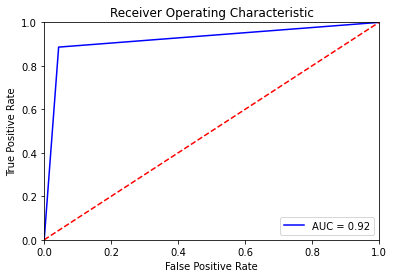

In [64]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()